## 🎥 **Movie Review Sentiment Analysis** 🎭

####Q1) **Divide the data into train/validation data sets, build 2 models to perform movie review sentiment analysis**

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns 

Import Data

In [ ]:
from google.colab import files
files.upload()

Saving Test.csv to Test.csv


{'Test.csv': b'\xef\xbb\xbftext,label\n"I always wrote this series off as being a complete stink-fest because Jim Belushi was involved in it, and heavily. But then one day a tragic happenstance occurred. After a White Sox game ended I realized that the remote was all the way on the other side of the room somehow. Now I could have just gotten up and walked across the room to get the remote, or even to the TV to turn the channel. But then why not just get up and walk across the country to watch TV in another state? ""Nuts to that"", I said. So I decided to just hang tight on the couch and take whatever Fate had in store for me. What Fate had in store was an episode of this show, an episode about which I remember very little except that I had once again made a very broad, general sweeping blanket judgment based on zero objective or experiential evidence with nothing whatsoever to back my opinions up with, and once again I was completely right! This show is a total crud-pie! Belushi has al

In [ ]:
df = pd.read_csv("Test.csv")
df.head()

text  label
0  I always wrote this series off as being a comp...      0
1  1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...      0
2  This movie was so poorly written and directed ...      0
3  The most interesting thing about Miryang (Secr...      1
4  when i first read about "berlin am meer" i did...      0

In [ ]:
df["text"].count()

5000

In [ ]:
df['label'].unique()

array([0, 1])

We have two labels:
* 1 - Positive Sentiment
* 0 - Negative Sentiment

In [ ]:
df["label"].value_counts()

1    2505
0    2495
Name: label, dtype: int64

There an almost equal number of instances of both classes in the dataset, we can thus say the data is balanced.

### **1. Perform required text pre-processing – lowering text, removing URLs, punctuation, stop words and correct spelling.**

Defining contractions to be expanded:

In [ ]:
contractions = {
"a'ight":"alright",
"ain't":"are not",
"amn't":"am not",
"aren't":"are not",
"can't":"cannot",
"'cause": "because",
"could've":"could have",
"couldn't":"could not",
"couldn't've":"could not have",
"daren't":"dare not",
"daresn't":"dare not",
"dasn't":"dare not",
"didn't":"did not",
"doesn't":"does not",
"don't":"do not",
"everybody's":"everybody is",
"everyone's":"everyone is",
"giv'n":"given",
"gonna":"going to",
"gon't":"go not", 
"gotta":"got to",
"hadn't":"had not",
"had've":"had have",
"hasn't":"has not",
"haven't":"have not",
"he'd":"he had", 
"he'll":"he will",
"he's":"he is",
"here's":"here is",
"how'd":"how did",
"how'll":"how will",
"how're":"how are",
"how's":"how is",
"I'd":"I had",
"I'd've":"I would have",
"I'd'nt":"I would not",
"I'd'nt've":"I would not have",
"I'll":"I will",
"I'm":"I am",
"I've":"I have",
"isn't":"is not",
"it'd":"it would",
"it'll":"it will",
"it's":"it is",
"let's":"let us",
"ma'am":"madam",
"mayn't":"may not",
"may've":"may have",
"mightn't":"might not",
"might've":"might have",
"mustn't":"must not",
"mustn't've":"must not have",
"must've":"must have",
"needn't":"need not",
"needn't've":"need not have",
"o'clock":"of the clock",
"oughtn't":"ought not",
"oughtn't've":"ought not have",
"shan't":"shall not",
"she'd":"she would",
"she'll":"she will",
"she's":"she is",
"should've":"should have",
"shouldn't":"should not",
"shouldn't've":"should not have",
"somebody's":"somebody is",
"someone's":"someone is",
"something's":"something is",
"so're":"so are",
"so’s":"so is",
"so’ve":"so have",
"that'll":"that will",
"that're":"that are",
"that's":"that is",
"that'd":"that would",
"there'd":"there would",
"there'll":"there will",
"there're":"there are",
"there's":"there is",
"these're":"these are",
"these've":"these have",
"they'd":"they would",
"they'll":"they will",
"they're":"they are",
"they've":"they have",
"this's":"this is",
"those're":"those are",
"those've":"those have",
"to've":"to have",
"wasn't":"was not",
"we'd":"we would",
"we'd've":"we would have",
"we'll":"we will",
"we're":"we are",
"we've":"we have",
"weren't":"were not",
"what'd":"what did",
"what'll":"what will",
"what're":"what are",
"what's":"what is",
"what've":"what have",
"when's":"when is",
"where'd":"where did",
"where'll":"where will",
"where're":"where are",
"where's":"where is",
"where've":"where have",
"which'd":"which would",
"which'll":"which will",
"which're":"which are",
"which's":"which is",
"which've":"which have",
"who'd":"who would",
"who'd've":"who would have",
"who'll":"who will",
"who're":"who are",
"who's":"who is",
"who've":"who have",
"why'd":"why did",
"why're":"why are",
"why's":"why is",
"won't":"will not",
"would've":"would have",
"wouldn't":"would not",
"wouldn't've":"would not have",
"y'at":"you at",
"yes’m":"yes madam",
"you'd":"you would",
"you'll":"you will",
"you're":"you are",
"you've":"you have",
"br": " "
}

Function to expand the contractions:

In [ ]:
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

Function to convert all text from uppercase to lowercase:

In [ ]:
def upper_to_lower(x):
    if type(x) is str:
        return x.lower()
    else:
        return x

Functino to remove all punctuations from review text:

In [ ]:
import string
def remove_punctuations(text):
    if type(text) is str:
        for p in string.punctuation:
            text = text.replace(p, '')
        return text
    else:
        return text 

Function to remove special characters:

In [ ]:
def remove_special_chars(text):
    special_chars = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    if type(text) is str:
        for p in special_chars:
            text = text.replace(p, '')
        return text
    else:
        return text

Defining the stopwords to be removed:

In [ ]:
import nltk.corpus
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import textblob

Applying all the functions defined above to the review text:

In [ ]:
df["text"] = df["text"].apply(lambda x:cont_to_exp(x))

In [ ]:
df['text'] = df['text'].apply(lambda x:upper_to_lower(x))

In [ ]:
df['text'] = df['text'].apply(lambda x:remove_punctuations(x))

In [ ]:
df['text'] = df['text'].apply(lambda x:remove_special_chars(x))

In [ ]:
df["text"] = df["text"].str.replace(r's*https?://S+(s+|$)', ' ').str.strip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:

df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
df.head()

text  label
0  always wrote series complete stinkfest jim bel...      0
1  1st watched 1272002 3 10dirsteve purcell typic...      0
2  movie poorly written directed fell asleep 30 m...      0
3  interesting thing miryang secret sunshine acto...      1
4  first read berlin meer expect much thought rig...      0

### **2. Perform tokenization and lemmatization on cleaned data.**

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer() # Creating an instance of the Tokenizer()
tokenizer.fit_on_texts(df["text"]) # Tokenizing the review text

Defining a lemmatizing function:

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [ ]:
df['text'] = df['text'].apply(lambda x:lemmatize_words(x))

### **3. Visualize the most frequent words and bigrams**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

Function to retreive the top n (n most frequently occurring) words:

In [ ]:
def get_top_n_words(x, n=None):
    vec = CountVectorizer(stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

Using the above defined function to retrieve the top n words:

In [ ]:
common_words = get_top_n_words(df['text'], 25)
common_words

[('film', 9565),
 ('movie', 8360),
 ('make', 4393),
 ('like', 4246),
 ('time', 3067),
 ('good', 2848),
 ('character', 2846),
 ('watch', 2806),
 ('think', 2417),
 ('really', 2268),
 ('story', 2245),
 ('look', 1942),
 ('know', 1882),
 ('end', 1870),
 ('bad', 1867),
 ('say', 1866),
 ('great', 1805),
 ('people', 1802),
 ('play', 1788),
 ('act', 1712),
 ('love', 1618),
 ('come', 1613),
 ('way', 1552),
 ('movies', 1521),
 ('plot', 1402)]

Unigram Dataframe:

In [ ]:
df_unigram = pd.DataFrame(common_words, columns = ['Unigram Text', 'Count'])
df_unigram

Unigram Text  Count
0          film   9565
1         movie   8360
2          make   4393
3          like   4246
4          time   3067
5          good   2848
6     character   2846
7         watch   2806
8         think   2417
9        really   2268
10        story   2245
11         look   1942
12         know   1882
13          end   1870
14          bad   1867
15          say   1866
16        great   1805
17       people   1802
18         play   1788
19          act   1712
20         love   1618
21         come   1613
22          way   1552
23       movies   1521
24         plot   1402

In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from plotly.offline import iplot

Function to retrieve the top n bigrams:

In [ ]:
def get_top_n_bigram(x, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

Retrieving the top 25 bigrams

In [ ]:
common_words = get_top_n_bigram(df['text'], 25)
common_words

[('look like', 352),
 ('watch movie', 289),
 ('film make', 261),
 ('movie make', 230),
 ('special effect', 216),
 ('main character', 198),
 ('make movie', 191),
 ('waste time', 181),
 ('film like', 174),
 ('make film', 173),
 ('watch film', 161),
 ('bad guy', 155),
 ('new york', 141),
 ('horror film', 137),
 ('make sense', 137),
 ('feel like', 128),
 ('like movie', 126),
 ('good movie', 125),
 ('low budget', 115),
 ('movie like', 113),
 ('years ago', 110),
 ('high school', 106),
 ('pretty good', 105),
 ('movie really', 104),
 ('movie good', 103)]

Bigram Dataframe:

In [ ]:
df_bigram = pd.DataFrame(
    common_words, 
    columns = ['Bigram Text', 'Count'])
df_bigram

Bigram Text  Count
0        look like    352
1      watch movie    289
2        film make    261
3       movie make    230
4   special effect    216
5   main character    198
6       make movie    191
7       waste time    181
8        film like    174
9        make film    173
10      watch film    161
11         bad guy    155
12        new york    141
13     horror film    137
14      make sense    137
15       feel like    128
16      like movie    126
17      good movie    125
18      low budget    115
19      movie like    113
20       years ago    110
21     high school    106
22     pretty good    105
23    movie really    104
24      movie good    103

###**4. Visualize the practical words that represent positive and negative sentiment in the dataset.**

####**Positive Sentiment:**

Isolating the positive reviews of the datast and combining them

In [ ]:
positive_rows = df[df["label"]==1] # Extract all rows with reviews of positive sentiment
positive_text = positive_rows["text"] # Extract only the "text" part of those rows
positive_reviews = ' '.join(positive_text) # Combine all of the positive reviews together, separated by spaces
print(positive_reviews[:500])  # Show the first 500 words of this combined text

interest thing miryang secret sunshine actors jeon doyeon lee shinae main character woman young son whose husband die tragic accident leave seoul live miryang home town young son jeons face changeable girlish flirtatious elegant age sad desperate joyous terribly isolate turn face film also star song kangho kim man meet car eaks come miryang happen run garage town follow around time thereafter despite apparent lack interest attentions song biggest star korea right renowned work park chanwook bong


In [ ]:
from textblob import TextBlob

Retreiving the top 500 positive unigram words from the dataframe

In [ ]:
positive_freq = get_top_n_words(positive_rows["text"], 500)
positive_freq

unigram = pd.DataFrame(positive_freq, columns = ['Unigram Text', 'Count'])
unigram['polarity'] = unigram['Unigram Text'].apply(lambda x: TextBlob(x).sentiment.polarity) # Calculate the sentiment of the unigram texts
unigram = unigram[unigram['polarity'] > 0] # Only keep the text with positive sentiment
unigram.sort_values('polarity', ascending=False) # Sort the dataframe according to sentiment polarity (highest to lowest)

Unigram Text  Count  polarity
76     excellent    322    1.0000
392    perfectly    104    1.0000
383     greatest    105    1.0000
19          best    813    1.0000
344       superb    114    1.0000
..           ...    ...       ...
251   completely    144    0.1000
60        action    353    0.1000
45           old    418    0.1000
144       direct    214    0.1000
400        major    102    0.0625

[68 rows x 3 columns]

Combine the most positive words:

In [ ]:
positive_wordcloud_text = ' '.join([word for word in unigram['Unigram Text']])

Creat a word cloud to show the significance of the most positive words

In [ ]:
from wordcloud import WordCloud

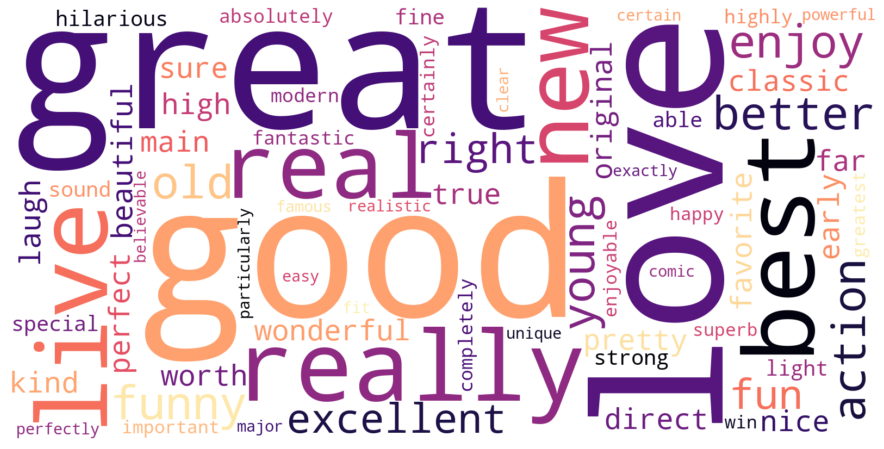

In [ ]:
positive_wordcloud = WordCloud(
    background_color='white',
    width=1600, height=800, colormap='magma').generate(positive_wordcloud_text)
plt.figure( figsize=(18,8))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

####**Negative Sentiment**

In [ ]:
negative_rows = df[df["label"]==0] # Extract rows where the sentiment is negative
negative_text = negative_rows["text"] # Extract only the text from those rows
negative_reviews = ' '.join(negative_text) # Combine all of the text together using spaces to separate them
print(negative_reviews[:500]) # Dispaly the top 500 words

always write series complete stinkfest jim belushi involve heavily one day tragic happenstance occur white sox game end realize remote way side room somehow could get walk across room get remote even tv turn channel get walk across country watch tv another state nut say decide hang tight couch take whatever fate store fate store episode show episode remember little except make oad general sweep blanket judgment base zero objective experiential evidence nothing whatsoever back opinions completely


Retreiving the top 500 negative unigram words from the dataframe

In [ ]:
negative_freq = get_top_n_words(negative_rows["text"], 500)
negative_freq

negative_unigram = pd.DataFrame(negative_freq, columns = ['Unigram Text', 'Count'])
negative_unigram['polarity'] = negative_unigram['Unigram Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
negative_unigram = negative_unigram[negative_unigram['polarity'] < 0] 
negative_unigram.sort_values('polarity', ascending=True) # Sorting the dataframe from most negative to least negative unigram

Unigram Text  Count  polarity
99           awful    282 -1.000000
241           evil    159 -1.000000
37           worst    486 -1.000000
139       horrible    229 -1.000000
95        terrible    296 -1.000000
266           base    149 -0.800000
192           crap    186 -0.800000
114         stupid    260 -0.800000
485          badly     85 -0.700000
6              bad   1496 -0.700000
396          scary    104 -0.500000
418      laughable     97 -0.500000
364           lame    112 -0.500000
335          sorry    120 -0.500000
491           fake     83 -0.500000
193  unfortunately    186 -0.500000
380          silly    108 -0.500000
497            sad     83 -0.500000
130          wrong    235 -0.500000
126           fail    238 -0.500000
89            poor    309 -0.400000
198           game    183 -0.400000
112          worse    264 -0.400000
307         poorly    127 -0.400000
483           dumb     85 -0.375000
388           weak    106 -0.375000
244     ridiculous    157 -0.333333
286      seriously    139 -0.333333
74            mean    354 -0.312500
359           slow    113 -0.300000
334           dull    120 -0.291667
116           hard    255 -0.291667
363        usually    112 -0.250000
459          alien     88 -0.250000
379           past    108 -0.250000
341          small    117 -0.250000
463      pointless     87 -0.250000
56           waste    405 -0.200000
295    predictable    134 -0.200000
496        destroy     83 -0.200000
162           dead    208 -0.200000
29          little    578 -0.187500
314           mess    124 -0.175000
226          black    168 -0.166667
488        subject     84 -0.166667
131           half    233 -0.166667
347           dark    116 -0.150000
437        average     93 -0.150000
320      extremely    122 -0.125000
411         single    100 -0.071429
84            long    329 -0.050000

Creating a word cloud of the most negative unigrams

In [ ]:
negative_wordcloud_text = ' '.join([word for word in negative_unigram['Unigram Text']])

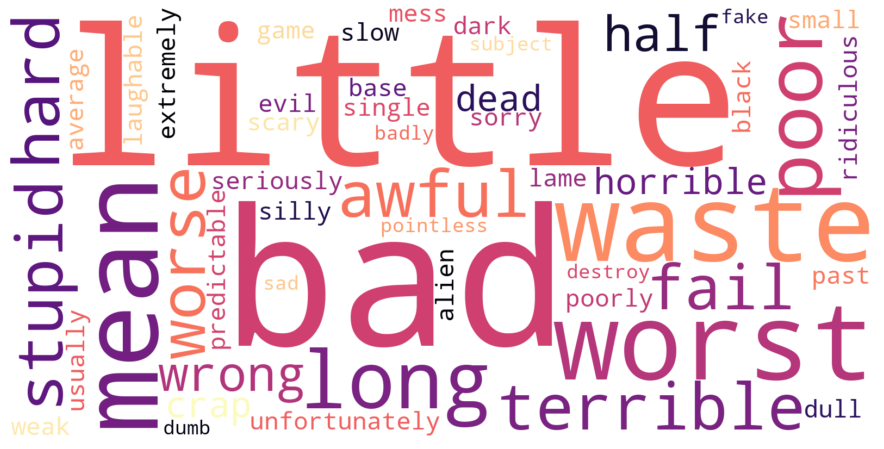

In [ ]:
negative_wordcloud = WordCloud(
    background_color='white',
    width=1600, height=800, colormap='magma').generate(negative_wordcloud_text)
plt.figure( figsize=(18,8))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

###**5. Create  an  embedding  layer  and  build  an LSTM and Bid RNN  for predicting the sentiment.**

In [ ]:
from tensorflow.keras.utils import to_categorical

Defining the independent and dependent variables:

In [ ]:
x = df["text"].values
y = to_categorical(df["label"].values)

In [ ]:
maxlen = 250
max_features = 60000

In [ ]:
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)

In [ ]:
from keras.preprocessing.sequence import pad_sequences 

In [ ]:
x

array([[   0,    0,    0, ..., 2923, 5298,  162],
       [   0,    0,    0, ...,   13,   11,  445],
       [   0,    0,    0, ...,    1,  685,  185],
       ...,
       [   0,    0,    0, ...,  173,  328,  950],
       [   0,    0,    0, ...,  752,  752,  752],
       [   0,    0,    0, ...,   47, 1074, 2259]], dtype=int32)

In [ ]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
x.shape

(5000, 250)

Splitting the text into train and test sets

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.8, random_state=42)

In [ ]:
x_train.shape

(4000, 250)

In [ ]:
y_train.shape

(4000, 2)

In [ ]:
print(y_train)

[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


####**LSTM:**
* Below is an LSTM that both compiled and fit my data. This resulted in a very low loss of less than 0.01 and high accuracy of above 0.95

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout
from keras.preprocessing.sequence import pad_sequences
from keras.layers.embeddings import Embedding

In [ ]:
final = Sequential()

final.add(Embedding(max_features,250,mask_zero=True))
final.add(LSTM(64,dropout=0.4, recurrent_dropout=0.4,return_sequences=True))
final.add(LSTM(32,dropout=0.5, recurrent_dropout=0.5,return_sequences=False))
final.add(Dense(2,activation='softmax'))
final.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
final.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 250)         15000000  
                                                                 
 lstm_14 (LSTM)              (None, None, 64)          80640     
                                                                 
 lstm_15 (LSTM)              (None, 32)                12416     
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 15,093,122
Trainable params: 15,093,122
Non-trainable params: 0
_________________________________________________________________


In [ ]:
final.fit(x_train, y_train, validation_data = (x_val,y_val),epochs = 10, batch_size=32)

Epoch 1/10
125/125 [==============================] - 68s 522ms/step - loss: 0.5287 - accuracy: 0.7325 - val_loss: 0.4555 - val_accuracy: 0.7800
Epoch 2/10
125/125 [==============================] - 64s 516ms/step - loss: 0.1841 - accuracy: 0.9325 - val_loss: 0.4564 - val_accuracy: 0.8320
Epoch 3/10
125/125 [==============================] - 65s 517ms/step - loss: 0.0471 - accuracy: 0.9847 - val_loss: 0.6454 - val_accuracy: 0.8180
Epoch 4/10
125/125 [==============================] - 64s 514ms/step - loss: 0.0180 - accuracy: 0.9960 - val_loss: 0.8332 - val_accuracy: 0.8100
Epoch 5/10
125/125 [==============================] - 65s 520ms/step - loss: 0.0235 - accuracy: 0.9918 - val_loss: 0.9248 - val_accuracy: 0.8030
Epoch 6/10
125/125 [==============================] - 64s 515ms/step - loss: 0.0143 - accuracy: 0.9955 - val_loss: 0.9789 - val_accuracy: 0.8020
Epoch 7/10
125/125 [==============================] - 65s 517ms/step - loss: 0.0060 - accuracy: 0.9987 - val_loss: 1.0100 - val_ac

####**BidRNN:**

In [ ]:
from tensorflow.keras.layers import Bidirectional

Building the model:

In [ ]:
bid_model = Sequential()
  
bid_model.add(Embedding(60000, 100))
bid_model.add(Bidirectional(LSTM(32,dropout=0.6)))
bid_model.add(Dense(2,activation='softmax'))
bid_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

Training the model:

In [ ]:
bid_model.fit(x_train, y_train, validation_data = (x_val,y_val),epochs = 10, batch_size=32)

Epoch 1/10
125/125 [==============================] - 20s 140ms/step - loss: 0.6644 - accuracy: 0.6382 - val_loss: 0.5848 - val_accuracy: 0.7830
Epoch 2/10
125/125 [==============================] - 17s 136ms/step - loss: 0.3342 - accuracy: 0.8780 - val_loss: 0.3695 - val_accuracy: 0.8480
Epoch 3/10
125/125 [==============================] - 17s 136ms/step - loss: 0.1109 - accuracy: 0.9645 - val_loss: 0.4573 - val_accuracy: 0.8380
Epoch 4/10
125/125 [==============================] - 17s 137ms/step - loss: 0.0425 - accuracy: 0.9883 - val_loss: 0.5617 - val_accuracy: 0.8440
Epoch 5/10
125/125 [==============================] - 17s 137ms/step - loss: 0.0126 - accuracy: 0.9973 - val_loss: 0.5949 - val_accuracy: 0.8390
Epoch 6/10
125/125 [==============================] - 18s 141ms/step - loss: 0.0070 - accuracy: 0.9983 - val_loss: 0.6169 - val_accuracy: 0.8120
Epoch 7/10
125/125 [==============================] - 17s 136ms/step - loss: 0.0038 - accuracy: 0.9992 - val_loss: 0.7471 - val_ac

###**6. Build your own test dataset with 10 movie reviews and tabulate accuracy.**

In [ ]:
files.upload()

Saving movie_test_data.csv to movie_test_data (1).csv


{'movie_test_data.csv': b'\xef\xbb\xbftext,label\r\n"Mean-spirited and hopelessly short on comic invention,\xc2\xa0Problem Child\xc2\xa0is a particularly unpleasant comedy, one that\'s loaded with manic scenery chewing and juvenile pranks.",0\r\nI hated this movie. Hated hated hated hated hated this movie. Hated it. Hated every simpering stupid vacant audience-insulting moment of it. Hated the sensibility that thought anyone would like it.,0\r\n"It\'s not really a movie. I suppose it\'s what could be called a recorded behavior. It simply reproduces, with some crude fidelity, the hapless anguish of a grieving man as he copes with his loss. It has no characters, it has no conflict, it has nothing that could be called a plot.\xc2\xa0",0\r\n"""I\'d rather wake up next to a severed horse head than ever watch \'Gotti\' again. The worst movie of the year so far, the long-awaited biopic about the Gambino crime boss\' rise from made man to top dog took four directors, 44 producers and eight yea

Importing my own dataset of reviews

In [ ]:
df_test = pd.read_csv("movie_test_data.csv")
df_test.head(10)

text  label
0  Mean-spirited and hopelessly short on comic in...      0
1  I hated this movie. Hated hated hated hated ha...      0
2  It's not really a movie. I suppose it's what c...      0
3  "I'd rather wake up next to a severed horse he...      0
4  “Jaws” still evokes warm memories in me. This ...      0
5  Interstellar gave me the same feeling I had wh...      1
6  This is at least a near-perfect psychological ...      1
7  “Despicable Me” is a perfect example of a fami...      1
8  The first film, a frenetic and hilarious tribu...      1
9  What lifts this is the left-field humour from ...      1

Performing text preprocessing using the functions defined above:

In [ ]:
df_test["text"] = df_test["text"].apply(lambda x:cont_to_exp(x))

In [ ]:
df_test['text'] = df_test['text'].apply(lambda x:upper_to_lower(x))

In [ ]:
df_test['text'] = df_test['text'].apply(lambda x:remove_punctuations(x))

In [ ]:
df_test['text'] = df_test['text'].apply(lambda x:remove_special_chars(x))

In [ ]:
df_test["text"] = df_test["text"].str.replace(r's*https?://S+(s+|$)', ' ').str.strip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [ ]:

df_test['text'] = df_test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
df.head()

text  label
0  always write series complete stinkfest jim bel...      0
1  1st watch 1272002 3 10dirsteve purcell typical...      0
2  movie poorly write direct fell asleep 30 minut...      0
3  interest thing miryang secret sunshine actors ...      1
4  first read berlin meer expect much think right...      0

Tokenize and lemmatize the text:

In [ ]:
tokenizer.fit_on_texts(df_test["text"])

In [ ]:
df_test['text'] = df_test['text'].apply(lambda x:lemmatize_words(x))

Define the x and y variables:

In [ ]:
x = df_test["text"].values
y = to_categorical(df_test["label"].values)

In [ ]:
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)

#### **LSTM Model:**
Use the model to predict sentiment:

In [ ]:
y_pred = final.predict(x)

In [ ]:
df_y = pd.DataFrame(y_pred)
df_y

0         1
0  0.001132  0.998868
1  0.999834  0.000166
2  0.979736  0.020264
3  0.999804  0.000196
4  0.999618  0.000382
5  0.000250  0.999750
6  0.992470  0.007530
7  0.000262  0.999738
8  0.022946  0.977054
9  0.999441  0.000559

Rounding the decimals and comparing with the labels of the text dataset I created, 7 out of 10 instances were classfied correctly by the LSTM (Accuracy of 70%).

####**Bid-RNN:**

In [ ]:
y_hat = bid_model.predict(x)

In [ ]:
df_y_2 = pd.DataFrame(y_hat)
df_y_2

0         1
0  0.025911  0.974089
1  0.996025  0.003975
2  0.993449  0.006551
3  0.997260  0.002740
4  0.984372  0.015628
5  0.003641  0.996359
6  0.939297  0.060703
7  0.006520  0.993480
8  0.759524  0.240476
9  0.979679  0.020321

Rounding the decimals and comparing with the labels of the text dataset I created, 6 out of 10 instances were classfied correctly by the Bidirectional RNN (Accuracy of 60%).

* However, both models seem to have missclassified the same three instances (0, 6, and 9). 
* This may be more so a comment on the ambiguity of the data and not the models. The reviews on rows 0, 6, and 9 may be difficult to predict sentiment labels for.
* Additionally, considering that this is a very small test dataset, it is difficult to assess the models' performance based on this.